In [1]:
# Main aim is to understand more about the data
# Data Analysis Phase

# Basic Library
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#Check for null values in all_data

with pd.option_context('display.max_rows', None,):
    print(train.isnull().sum()/len(train)*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [5]:
train.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],axis=1,inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

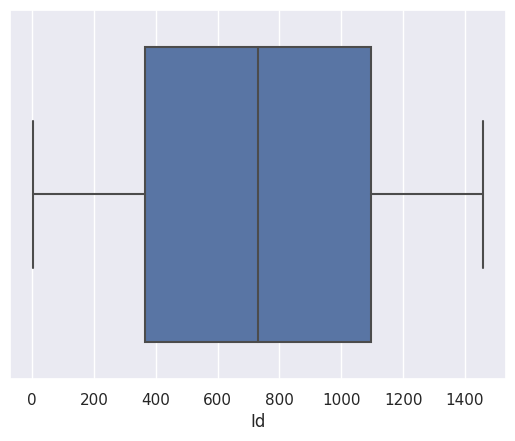

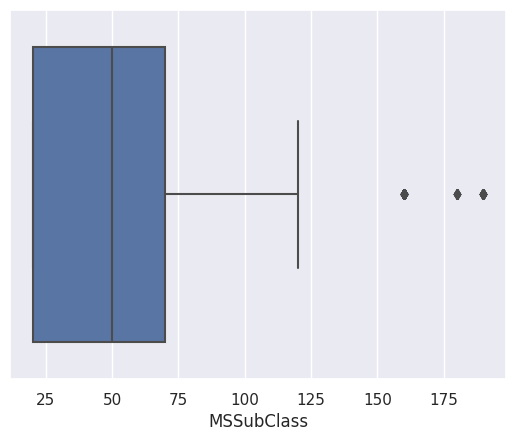

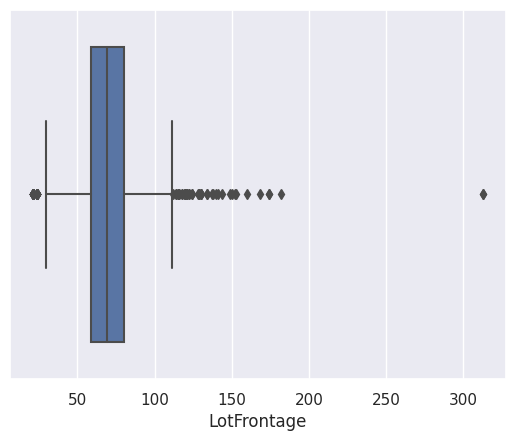

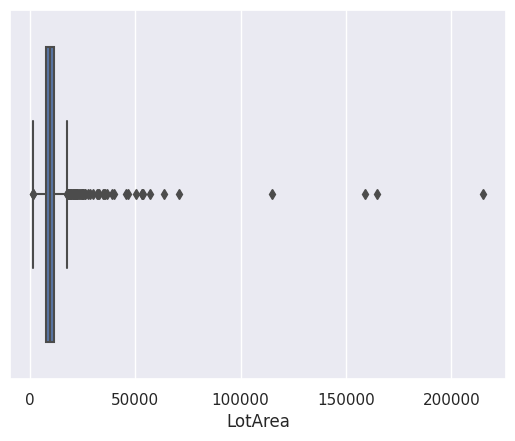

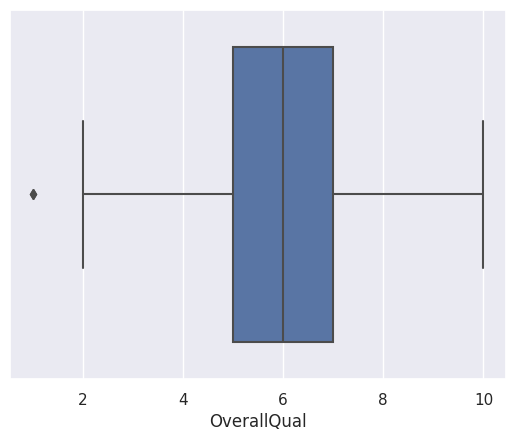

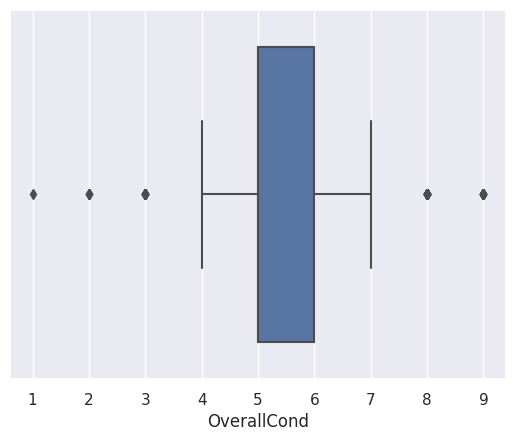

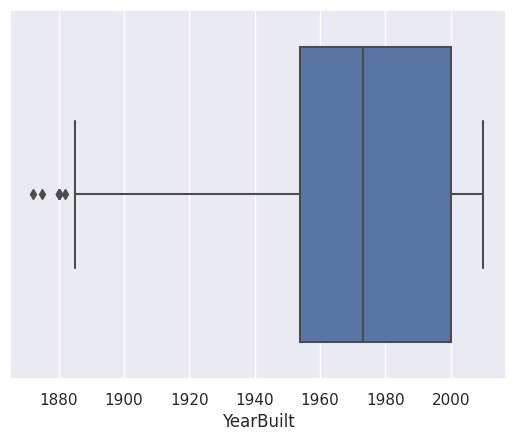

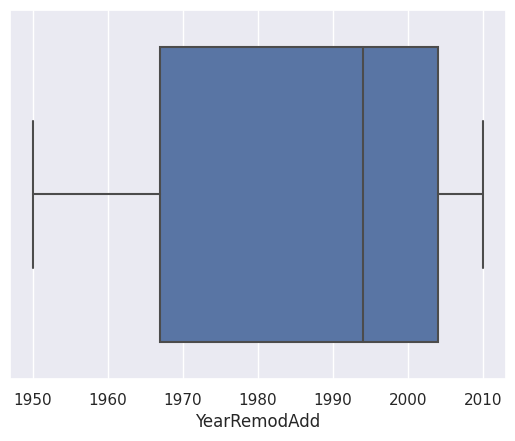

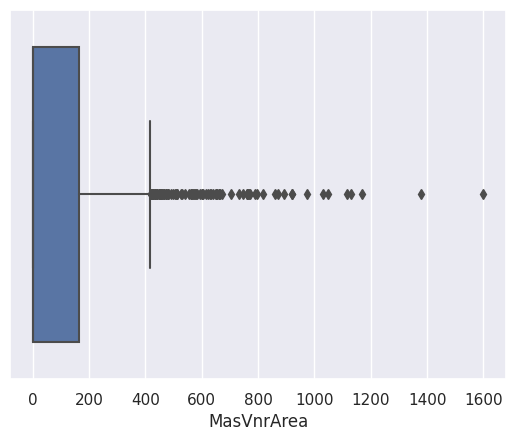

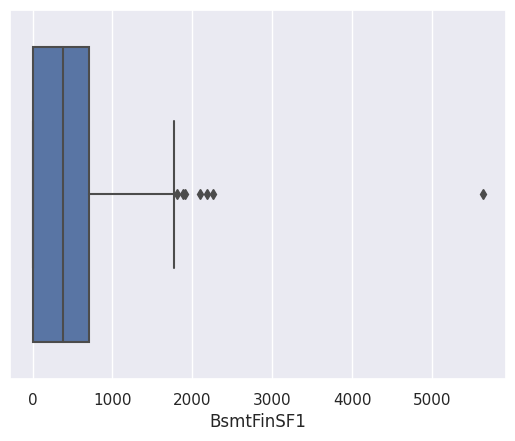

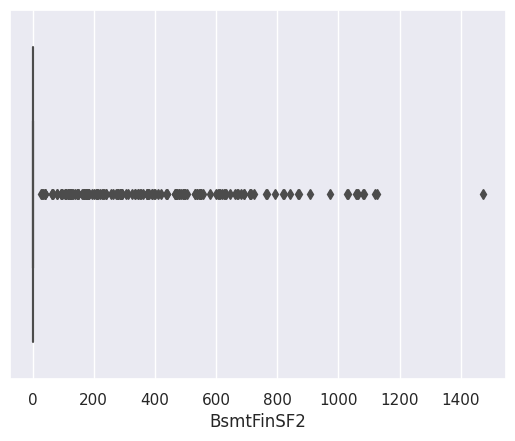

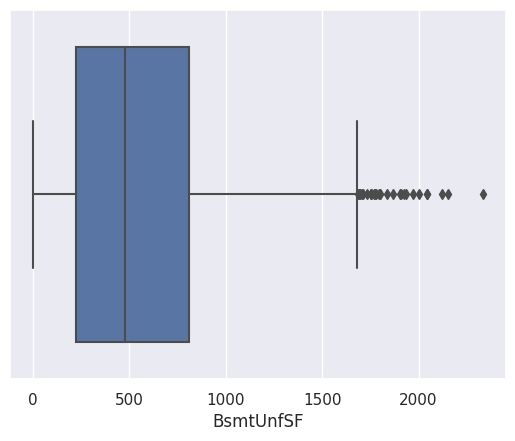

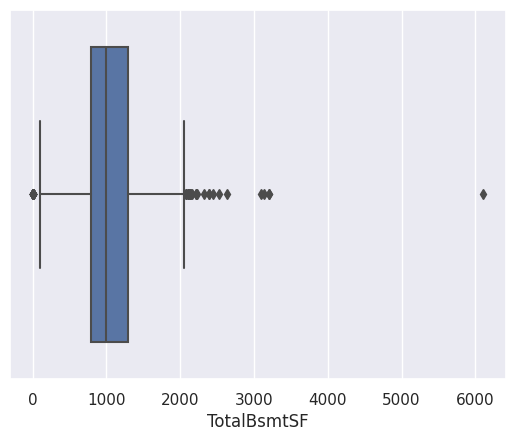

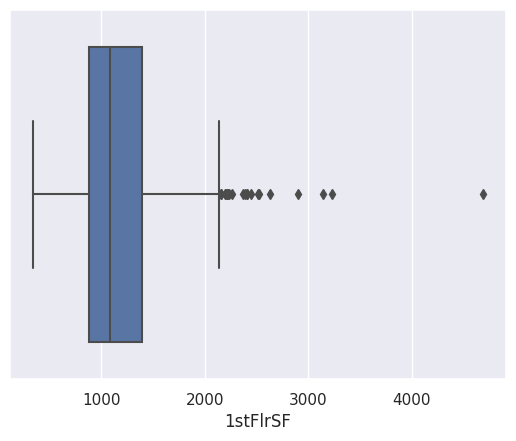

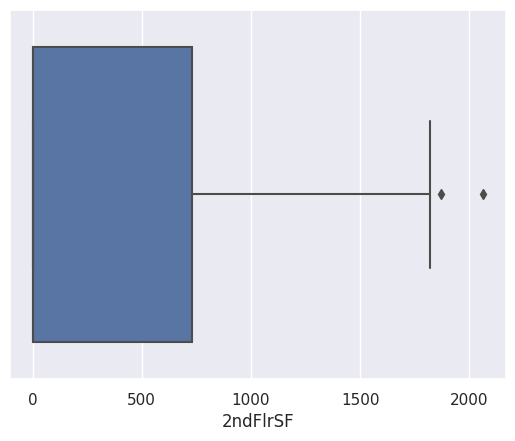

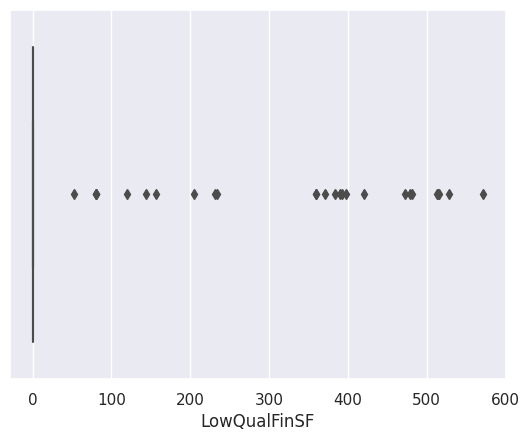

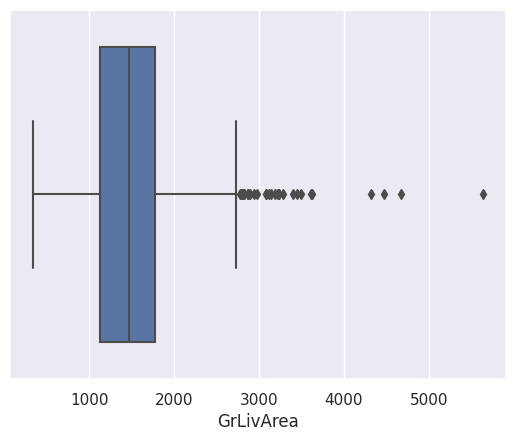

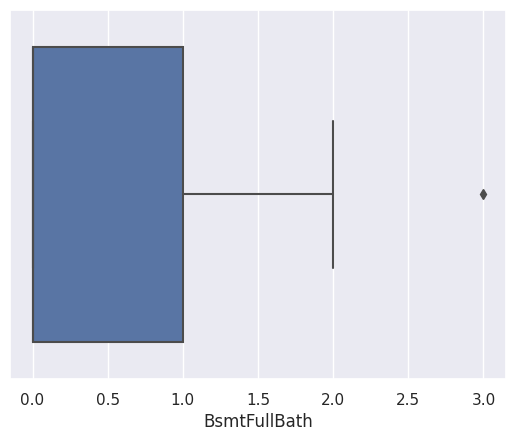

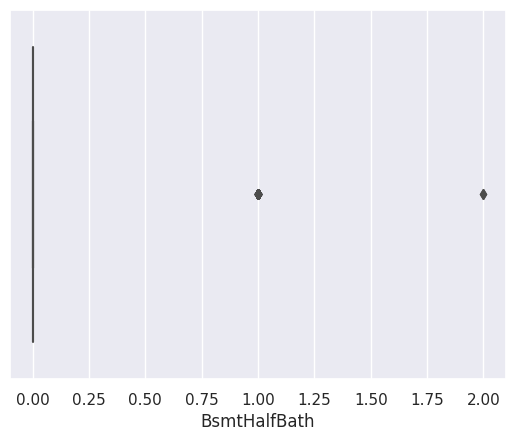

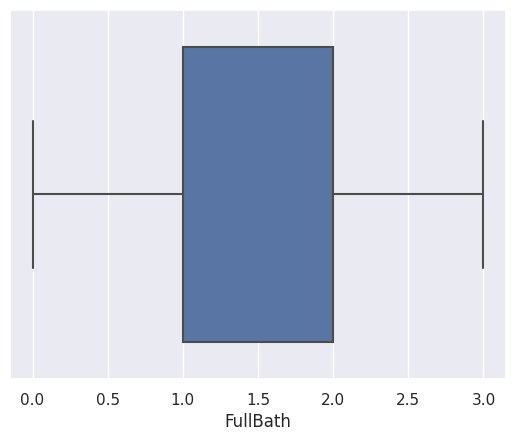

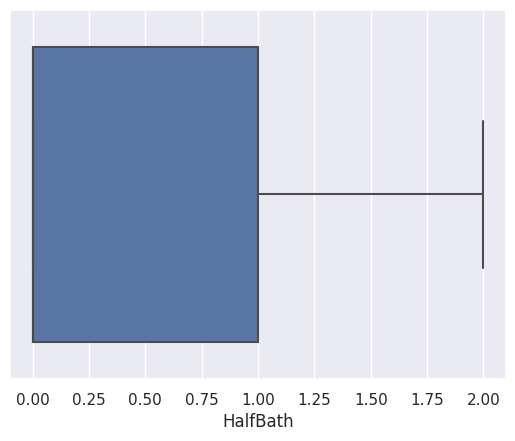

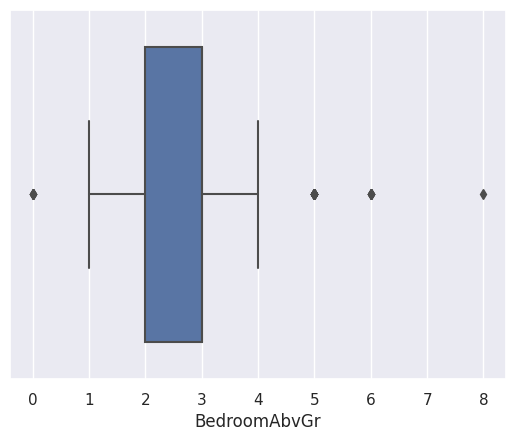

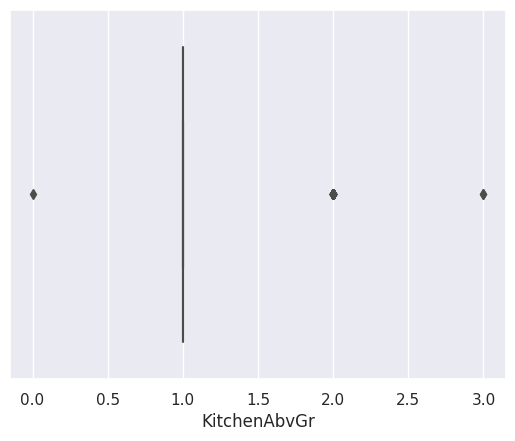

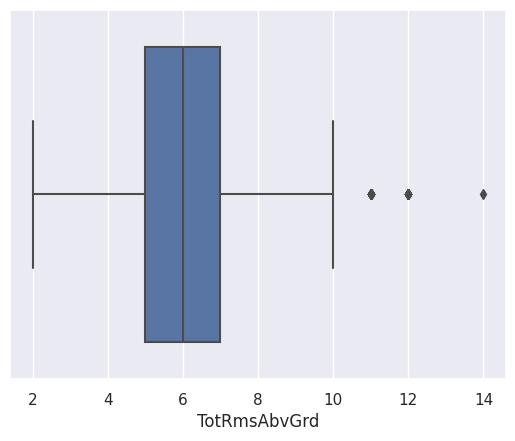

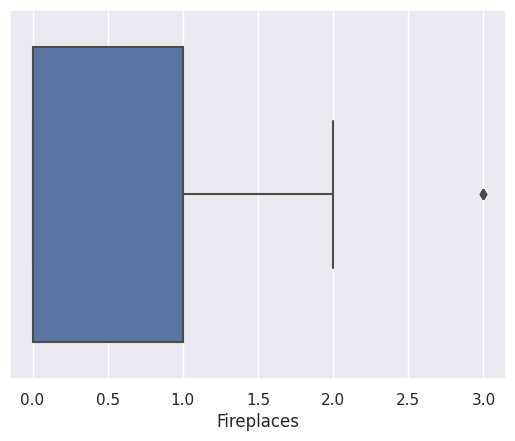

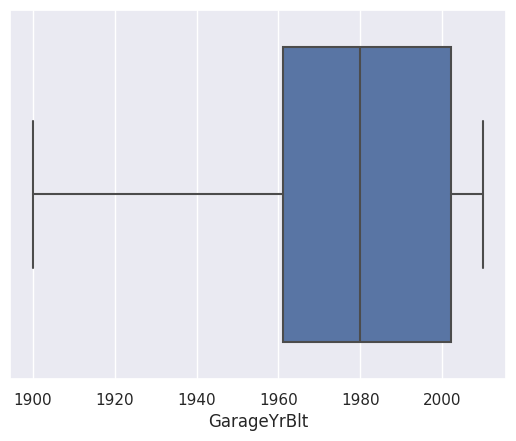

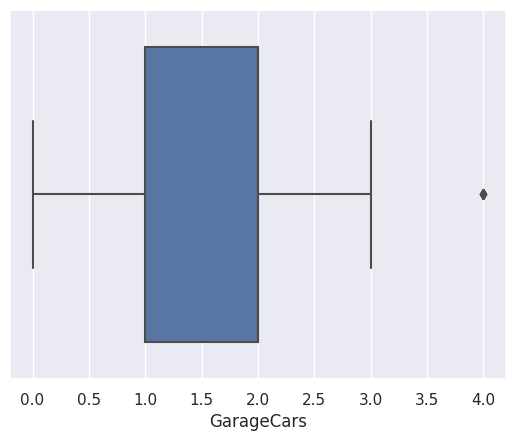

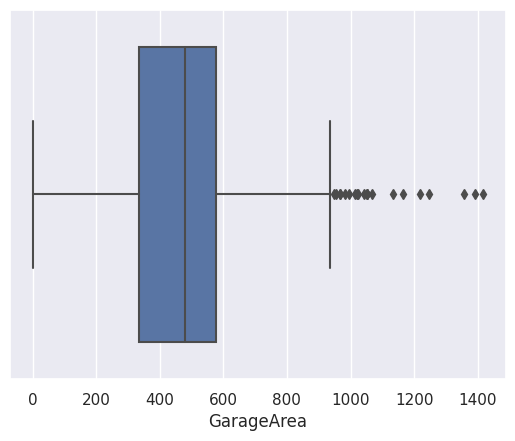

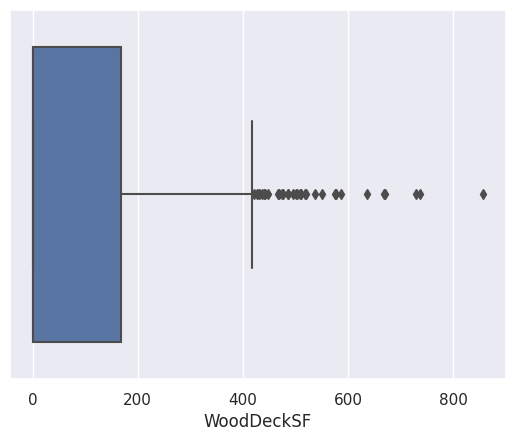

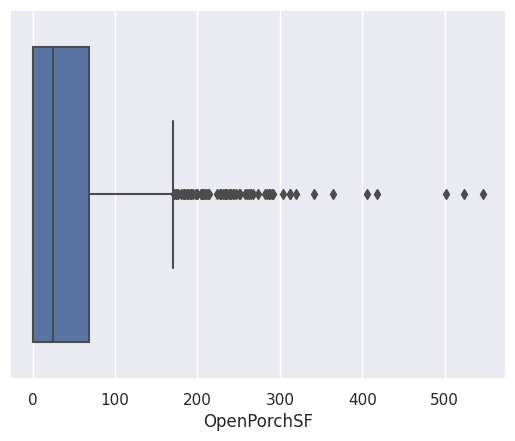

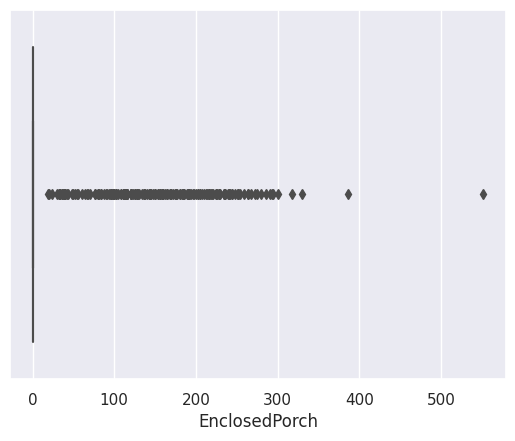

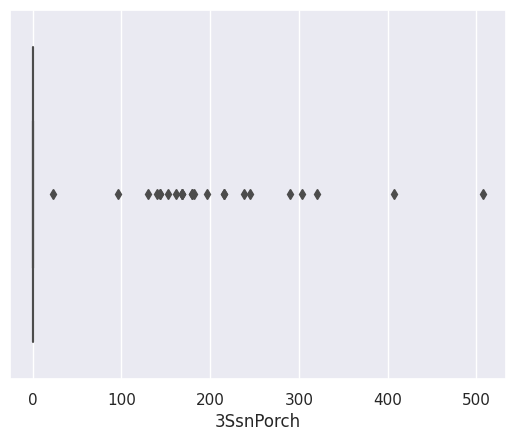

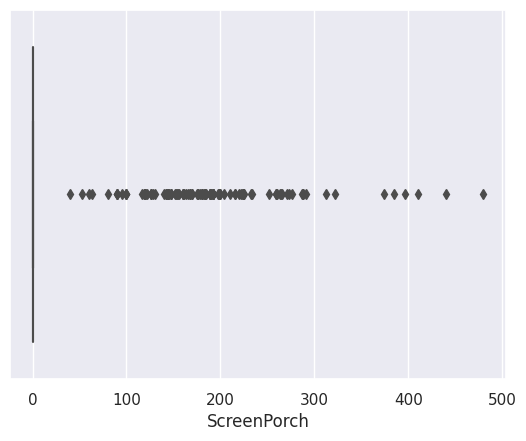

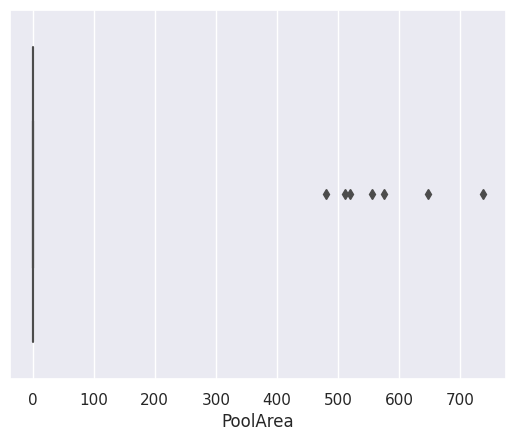

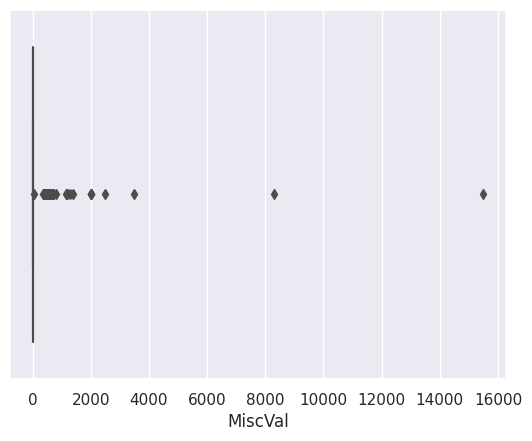

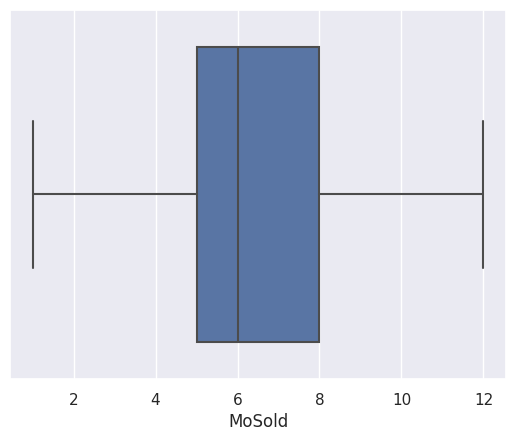

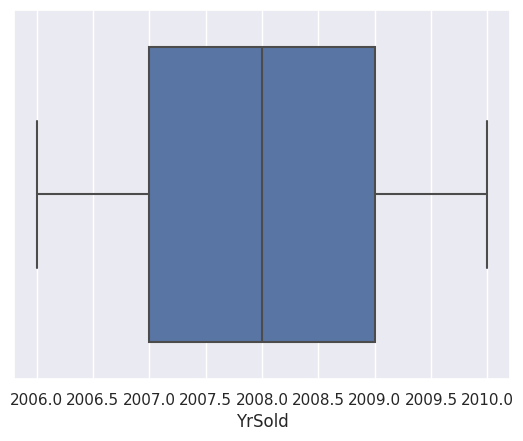

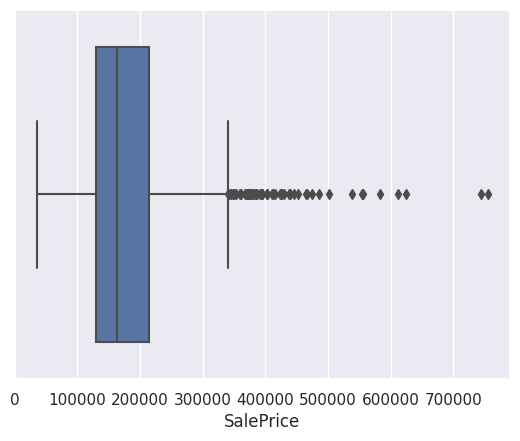

In [7]:
df1=train.select_dtypes(exclude=['object'])

for column in df1:
        sns.boxplot(data=df1, x=column)
        plt.show()


In [8]:
train['MSZoning'].fillna(train['MSZoning'].mode()[0],inplace=True)
train['LotFrontage'].fillna(train['LotFrontage'].median(),inplace=True)
train['Utilities'].fillna(train['Utilities'].mode()[0],inplace=True)
train['Exterior1st'].fillna(train['Exterior1st'].mode()[0],inplace=True)
train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0],inplace=True)
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0],inplace=True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0],inplace=True)
train['BsmtQual'].fillna(train['BsmtQual'].mode()[0],inplace=True)
train['BsmtCond'].fillna(train['BsmtCond'].mode()[0],inplace=True)
train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0],inplace=True)
train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0],inplace=True)
train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0],inplace=True)
train['TotalBsmtSF'].fillna(train['TotalBsmtSF'].median(),inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)
train['BsmtFullBath'].fillna(train['BsmtFullBath'].median(),inplace=True)
train['BsmtHalfBath'].fillna(train['BsmtHalfBath'].median(),inplace=True)
train['KitchenQual'].fillna(train['KitchenQual'].mode()[0],inplace=True)
train['Functional'].fillna(train['Functional'].mode()[0],inplace=True)
train['GarageType'].fillna(train['GarageType'].mode()[0],inplace=True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(),inplace=True)
train['GarageFinish'].fillna(train['GarageFinish'].mode()[0],inplace=True)
train['GarageCars'].fillna(train['GarageCars'].median(),inplace=True)
train['GarageArea'].fillna(train['GarageArea'].median(),inplace=True)
train['GarageQual'].fillna(train['GarageQual'].mode()[0],inplace=True)
train['GarageCond'].fillna(train['GarageCond'].mode()[0],inplace=True)
train['SaleType'].fillna(train['SaleType'].mode()[0],inplace=True)
train['SalePrice'].fillna(train['SalePrice'].median(),inplace=True)

In [9]:
#Check for null values in all_data

with pd.option_context('display.max_rows', None,):
    print(train.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [10]:
#Use ANOVA Testing to check significance of variable


import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ MSSubClass', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped

import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ MSZoning', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped

import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ LotFrontage', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped

import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ LotArea', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped

import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ Street', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped

import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ LotShape', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped


import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ LandContour', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped



mymod_id = ols('SalePrice ~ Utilities', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=0.131536(>0.05) not a significant variable can be dropped



mymod_id = ols('SalePrice ~ LotConfig', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=0.0.0107(<0.05) a significant variable cannot be dropped


mymod_id = ols('SalePrice ~ LandSlope', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=0.650448(>0.05) not a significant variable can be dropped


mymod_id = ols('SalePrice ~ Neighborhood', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=0.000005(>0.05) a significant variable cannot be dropped



mymod_id = ols('SalePrice ~ Condition1', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.632887e-24(>0.05) not a significant variable can be dropped


mymod_id = ols('SalePrice ~ Condition2', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=0.000002(<0.05) a significant variable cannot be dropped 


mymod_id = ols('SalePrice ~ BldgType', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=4.692665e-09(>0.05) not a significant variable can be dropped 


mymod_id = ols('SalePrice ~ HouseStyle', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=8.065780e-41(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ OverallQual', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ OverallCond', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ YearBuilt', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 


mymod_id = ols('SalePrice ~ YearRemodAdd', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ RoofStyle', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ RoofMatl', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ Exterior1st', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ Exterior2nd', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 


mymod_id = ols('SalePrice ~ MasVnrType', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ MasVnrArea', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ ExterQual', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ ExterCond', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

                df        sum_sq       mean_sq          F    PR(>F)
MSSubClass     1.0  6.541130e+10  6.541130e+10  10.431466  0.001266
Residual    1458.0  9.142500e+12  6.270576e+09        NaN       NaN
              df        sum_sq       mean_sq          F        PR(>F)
MSZoning     4.0  9.904000e+11  2.476000e+11  43.840282  8.817634e-35
Residual  1455.0  8.217511e+12  5.647774e+09        NaN           NaN
                 df        sum_sq       mean_sq           F        PR(>F)
LotFrontage     1.0  1.031945e+12  1.031945e+12  184.024149  1.446985e-39
Residual     1458.0  8.175967e+12  5.607659e+09         NaN           NaN
              df        sum_sq       mean_sq           F        PR(>F)
LotArea      1.0  6.409932e+11  6.409932e+11  109.090355  1.123139e-24
Residual  1458.0  8.566918e+12  5.875801e+09         NaN           NaN
              df        sum_sq       mean_sq        F    PR(>F)
Street       1.0  1.550534e+10  1.550534e+10  2.45929  0.117049
Residual  1458.0  9.192

In [11]:
#Drop columns with high p-value

train.drop(['LandSlope','Utilities','Street'],axis=1,inplace=True)


In [12]:
#Use ANOVA Testing to check significance of variable


import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ Foundation', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped

import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ BsmtQual', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped

import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ BsmtCond', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped

import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ BsmtExposure', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped

import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ BsmtFinType1', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped

import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ BsmtFinType2', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped


import statsmodels.api as sm
from statsmodels.formula.api import ols
mymod_id = ols('SalePrice ~ TotalBsmtSF', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.414987e-16(<0.05) a significant variable cannot be dropped



mymod_id = ols('SalePrice ~ Heating', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=0.131536(>0.05) not a significant variable can be dropped



mymod_id = ols('SalePrice ~ HeatingQC', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=0.0.0107(<0.05) a significant variable cannot be dropped


mymod_id = ols('SalePrice ~ CentralAir', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=0.650448(>0.05) not a significant variable can be dropped


mymod_id = ols('SalePrice ~ Electrical', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=0.000005(>0.05) a significant variable cannot be dropped



mymod_id = ols('SalePrice ~ LowQualFinSF', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable)  #PR=6.632887e-24(>0.05) not a significant variable can be dropped


mymod_id = ols('SalePrice ~ GrLivArea', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=0.000002(<0.05) a significant variable cannot be dropped 


mymod_id = ols('SalePrice ~ BsmtFullBath', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=4.692665e-09(>0.05) not a significant variable can be dropped 


mymod_id = ols('SalePrice ~ BsmtHalfBath', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=8.065780e-41(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ FullBath', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ HalfBath', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ BedroomAbvGr', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 


mymod_id = ols('SalePrice ~ KitchenAbvGr', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ KitchenQual', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ TotRmsAbvGrd', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ Fireplaces', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ GarageType', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 


mymod_id = ols('SalePrice ~ GarageYrBlt', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ GarageFinish', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ GarageCars', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ GarageArea', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ GarageQual', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ GarageCond', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ PavedDrive', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ WoodDeckSF', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ OpenPorchSF', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ EnclosedPorch', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 


mymod_id = ols('SalePrice ~ ScreenPorch', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ PoolArea', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ MiscVal', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ MoSold', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ YrSold', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ SaleType', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

mymod_id = ols('SalePrice ~ SaleCondition', data = train).fit()  
# performing type 2 anova test  
aovtable = sm.stats.anova_lm(mymod_id, typ = 1) 
print(aovtable) #PR=2.990386e-16(>0.05) not a significant variable can be dropped 

                df        sum_sq       mean_sq           F        PR(>F)
Foundation     5.0  2.360618e+12  4.721235e+11  100.253851  5.791895e-91
Residual    1454.0  6.847294e+12  4.709280e+09         NaN           NaN
              df        sum_sq       mean_sq           F         PR(>F)
BsmtQual     3.0  4.238479e+12  1.412826e+12  413.945648  2.078120e-194
Residual  1456.0  4.969433e+12  3.413072e+09         NaN            NaN
              df        sum_sq       mean_sq          F        PR(>F)
BsmtCond     3.0  2.544326e+11  8.481085e+10  13.791801  7.166578e-09
Residual  1456.0  8.953479e+12  6.149367e+09        NaN           NaN
                  df        sum_sq       mean_sq          F        PR(>F)
BsmtExposure     3.0  1.254865e+12  4.182884e+11  76.577934  5.394238e-46
Residual      1456.0  7.953046e+12  5.462257e+09        NaN           NaN
                  df        sum_sq       mean_sq          F        PR(>F)
BsmtFinType1     5.0  1.797106e+12  3.594211e+11  70.518425

In [13]:
train.drop(['LowQualFinSF','BsmtHalfBath','MiscVal','MoSold','YrSold'],axis=1,inplace=True)

In [14]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,WD,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,WD,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,WD,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,WD,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,WD,Normal,250000


In [15]:
train.drop('Id',axis=1,inplace=True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [17]:
income_q1 = train['MSSubClass'].quantile(0.25)
income_q3 = train['MSSubClass'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr

train['MSSubClass'] = np.where(train['MSSubClass'] > income_upper, income_upper,
                                     np.where(train['MSSubClass'] < income_lower, income_lower,
                                            train['MSSubClass']) )


income_q1 = train['LotFrontage'].quantile(0.25)
income_q3 = train['LotFrontage'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr

train['LotFrontage'] = np.where(train['LotFrontage'] > income_upper, income_upper,
                                     np.where(train['LotFrontage'] < income_lower, income_lower,
                                            train['LotFrontage']) )

income_q1 = train['LotArea'].quantile(0.25)
income_q3 = train['LotArea'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr

train['LotArea'] = np.where(train['LotArea'] > income_upper, income_upper,
                                     np.where(train['LotArea'] < income_lower, income_lower,
                                            train['LotArea']) )

income_q1 = train['OverallQual'].quantile(0.25)
income_q3 = train['OverallQual'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr

train['OverallQual'] = np.where(train['OverallQual'] > income_upper, income_upper,
                                     np.where(train['OverallQual'] < income_lower, income_lower,
                                            train['OverallQual']) )


income_q1 = train['OverallCond'].quantile(0.25)
income_q3 = train['OverallCond'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr


train['OverallCond'] = np.where(train['OverallCond'] > income_upper, income_upper,
                                     np.where(train['OverallCond'] < income_lower, income_lower,
                                            train['OverallCond']) )


income_q1 = train['YearBuilt'].quantile(0.25)
income_q3 = train['YearBuilt'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['YearBuilt'] = np.where(train['YearBuilt'] > income_upper, income_upper,
                                     np.where(train['YearBuilt'] < income_lower, income_lower,
                                            train['YearBuilt']) )



income_q1 = train['YearRemodAdd'].quantile(0.25)
income_q3 = train['YearRemodAdd'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['YearRemodAdd'] = np.where(train['YearRemodAdd'] > income_upper, income_upper,
                                     np.where(train['YearRemodAdd'] < income_lower, income_lower,
                                            train['YearRemodAdd']) )



income_q1 = train['MasVnrArea'].quantile(0.25)
income_q3 = train['MasVnrArea'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['MasVnrArea'] = np.where(train['MasVnrArea'] > income_upper, income_upper,
                                     np.where(train['MasVnrArea'] < income_lower, income_lower,
                                            train['MasVnrArea']) )

income_q1 = train['TotalBsmtSF'].quantile(0.25)
income_q3 = train['TotalBsmtSF'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['TotalBsmtSF'] = np.where(train['TotalBsmtSF'] > income_upper, income_upper,
                                     np.where(train['TotalBsmtSF'] < income_lower, income_lower,
                                            train['TotalBsmtSF']) )

income_q1 = train['FullBath'].quantile(0.25)
income_q3 = train['FullBath'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['FullBath'] = np.where(train['FullBath'] > income_upper, income_upper,
                                     np.where(train['FullBath'] < income_lower, income_lower,
                                            train['FullBath']) )

income_q1 = train['HalfBath'].quantile(0.25)
income_q3 = train['HalfBath'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['HalfBath'] = np.where(train['HalfBath'] > income_upper, income_upper,
                                     np.where(train['HalfBath'] < income_lower, income_lower,
                                            train['HalfBath']) )

income_q1 = train['BedroomAbvGr'].quantile(0.25)
income_q3 = train['BedroomAbvGr'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['BedroomAbvGr'] = np.where(train['BedroomAbvGr'] > income_upper, income_upper,
                                     np.where(train['BedroomAbvGr'] < income_lower, income_lower,
                                            train['BedroomAbvGr']) )

income_q1 = train['KitchenAbvGr'].quantile(0.25)
income_q3 = train['KitchenAbvGr'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['KitchenAbvGr'] = np.where(train['KitchenAbvGr'] > income_upper, income_upper,
                                     np.where(train['KitchenAbvGr'] < income_lower, income_lower,
                                            train['KitchenAbvGr']) )

income_q1 = train['TotRmsAbvGrd'].quantile(0.25)
income_q3 = train['TotRmsAbvGrd'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['TotRmsAbvGrd'] = np.where(train['TotRmsAbvGrd'] > income_upper, income_upper,
                                     np.where(train['TotRmsAbvGrd'] < income_lower, income_lower,
                                            train['TotRmsAbvGrd']) )

income_q1 = train['Fireplaces'].quantile(0.25)
income_q3 = train['Fireplaces'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['Fireplaces'] = np.where(train['Fireplaces'] > income_upper, income_upper,
                                     np.where(train['Fireplaces'] < income_lower, income_lower,
                                            train['Fireplaces']) )

income_q1 = train['GarageYrBlt'].quantile(0.25)
income_q3 = train['GarageYrBlt'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['GarageYrBlt'] = np.where(train['GarageYrBlt'] > income_upper, income_upper,
                                     np.where(train['GarageYrBlt'] < income_lower, income_lower,
                                            train['GarageYrBlt']) )

income_q1 = train['GarageCars'].quantile(0.25)
income_q3 = train['GarageCars'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['GarageCars'] = np.where(train['GarageCars'] > income_upper, income_upper,
                                     np.where(train['GarageCars'] < income_lower, income_lower,
                                            train['GarageCars']) )

income_q1 = train['GarageArea'].quantile(0.25)
income_q3 = train['GarageArea'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['GarageArea'] = np.where(train['GarageArea'] > income_upper, income_upper,
                                     np.where(train['GarageArea'] < income_lower, income_lower,
                                            train['GarageArea']) )

income_q1 = train['WoodDeckSF'].quantile(0.25)
income_q3 = train['WoodDeckSF'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['WoodDeckSF'] = np.where(train['WoodDeckSF'] > income_upper, income_upper,
                                     np.where(train['WoodDeckSF'] < income_lower, income_lower,
                                            train['WoodDeckSF']) )


income_q1 = train['OpenPorchSF'].quantile(0.25)
income_q3 = train['OpenPorchSF'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['OpenPorchSF'] = np.where(train['OpenPorchSF'] > income_upper, income_upper,
                                     np.where(train['OpenPorchSF'] < income_lower, income_lower,
                                            train['OpenPorchSF']) )

income_q1 = train['EnclosedPorch'].quantile(0.25)
income_q3 = train['EnclosedPorch'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['EnclosedPorch'] = np.where(train['EnclosedPorch'] > income_upper, income_upper,
                                     np.where(train['EnclosedPorch'] < income_lower, income_lower,
                                            train['EnclosedPorch']) )

income_q1 = train['OpenPorchSF'].quantile(0.25)
income_q3 = train['OpenPorchSF'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['OpenPorchSF'] = np.where(train['OpenPorchSF'] > income_upper, income_upper,
                                     np.where(train['OpenPorchSF'] < income_lower, income_lower,
                                            train['OpenPorchSF']) )

income_q1 = train['PoolArea'].quantile(0.25)
income_q3 = train['PoolArea'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['PoolArea'] = np.where(train['PoolArea'] > income_upper, income_upper,
                                     np.where(train['PoolArea'] < income_lower, income_lower,
                                            train['PoolArea']) )


income_q1 = train['GrLivArea'].quantile(0.25)
income_q3 = train['GrLivArea'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['GrLivArea'] = np.where(train['GrLivArea'] > income_upper, income_upper,
                                     np.where(train['GrLivArea'] < income_lower, income_lower,
                                            train['GrLivArea']) )


income_q1 = train['BsmtFullBath'].quantile(0.25)
income_q3 = train['BsmtFullBath'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['BsmtFullBath'] = np.where(train['BsmtFullBath'] > income_upper, income_upper,
                                     np.where(train['BsmtFullBath'] < income_lower, income_lower,
                                            train['BsmtFullBath']) )

income_q1 = train['ScreenPorch'].quantile(0.25)
income_q3 = train['ScreenPorch'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['ScreenPorch'] = np.where(train['ScreenPorch'] > income_upper, income_upper,
                                     np.where(train['ScreenPorch'] < income_lower, income_lower,
                                            train['ScreenPorch']) )

income_q1 = train['BsmtFinSF1'].quantile(0.25)
income_q3 = train['BsmtFinSF1'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['BsmtFinSF1'] = np.where(train['BsmtFinSF1'] > income_upper, income_upper,
                                     np.where(train['BsmtFinSF1'] < income_lower, income_lower,
                                            train['BsmtFinSF1']) )

income_q1 = train['BsmtFinSF2'].quantile(0.25)
income_q3 = train['BsmtFinSF2'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['BsmtFinSF2'] = np.where(train['BsmtFinSF2'] > income_upper, income_upper,
                                     np.where(train['BsmtFinSF2'] < income_lower, income_lower,
                                            train['BsmtFinSF2']) )

income_q1 = train['BsmtUnfSF'].quantile(0.25)
income_q3 = train['BsmtUnfSF'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['BsmtUnfSF'] = np.where(train['BsmtUnfSF'] > income_upper, income_upper,
                                     np.where(train['BsmtUnfSF'] < income_lower, income_lower,
                                            train['BsmtUnfSF']) )
                                           

income_q1 = train['2ndFlrSF'].quantile(0.25)
income_q3 = train['2ndFlrSF'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['2ndFlrSF'] = np.where(train['2ndFlrSF'] > income_upper, income_upper,
                                     np.where(train['2ndFlrSF'] < income_lower, income_lower,
                                            train['2ndFlrSF']) )
                                           

income_q1 = train['1stFlrSF'].quantile(0.25)
income_q3 = train['1stFlrSF'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['1stFlrSF'] = np.where(train['1stFlrSF'] > income_upper, income_upper,
                                     np.where(train['1stFlrSF'] < income_lower, income_lower,
                                            train['1stFlrSF']) )

income_q1 = train['SalePrice'].quantile(0.25)
income_q3 = train['SalePrice'].quantile(0.75)
income_iqr = income_q3 -  income_q1
income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr
train['SalePrice'] = np.where(train['SalePrice'] > income_upper, income_upper,
                                     np.where(train['SalePrice'] < income_lower, income_lower,
                                            train['SalePrice']) )

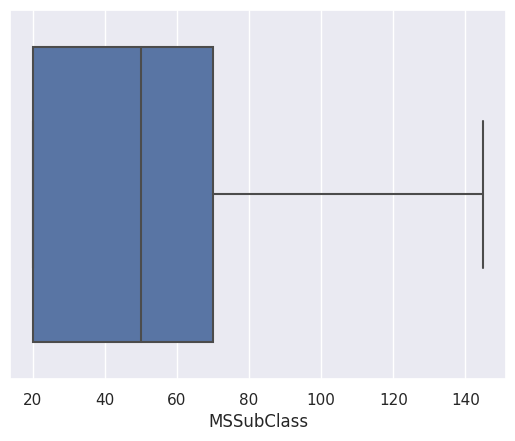

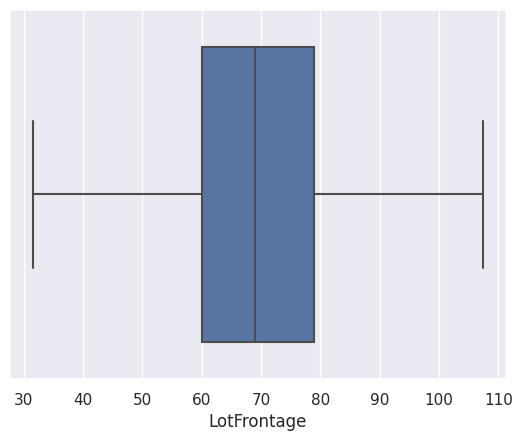

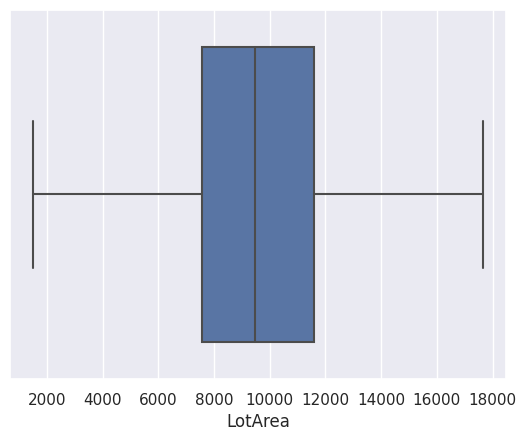

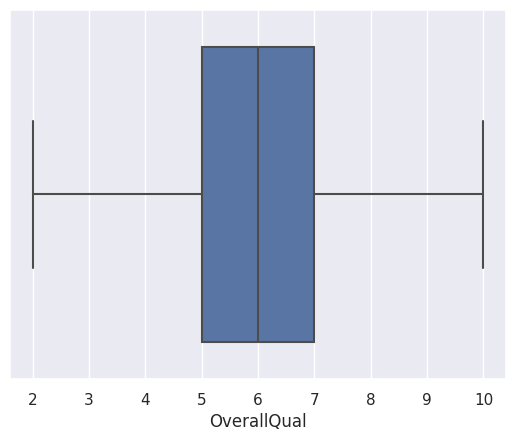

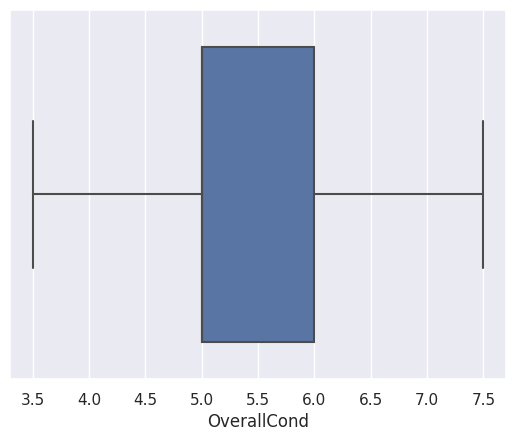

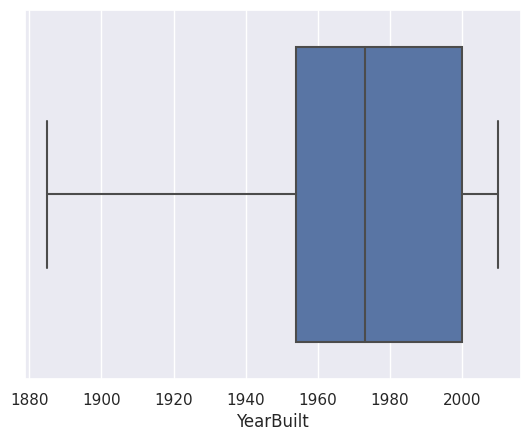

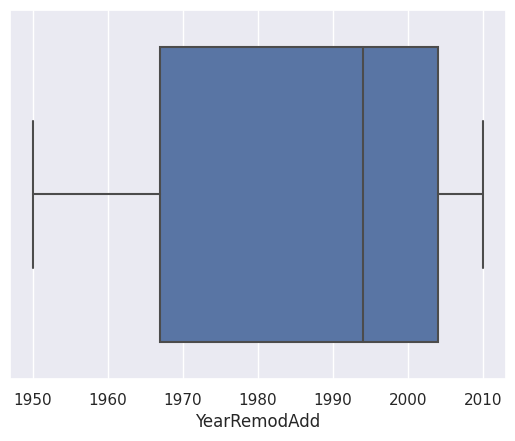

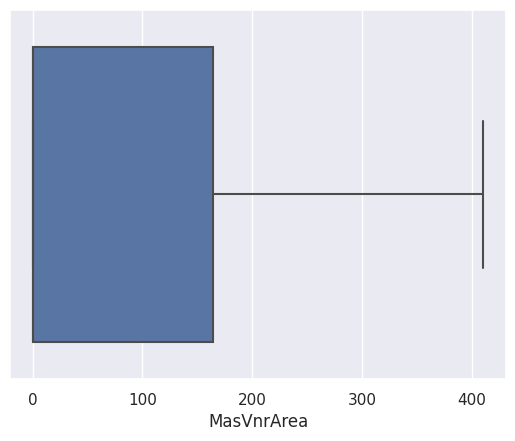

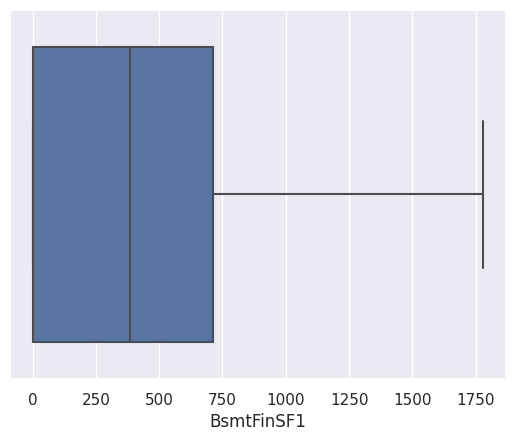

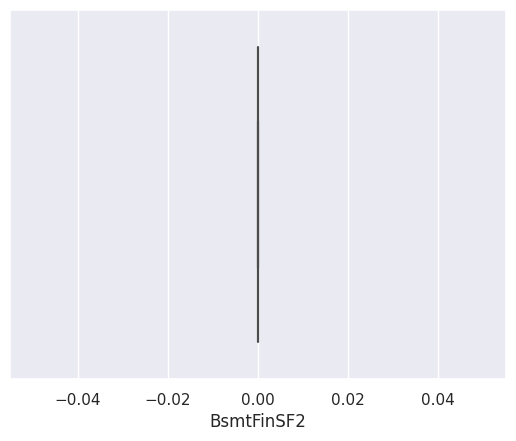

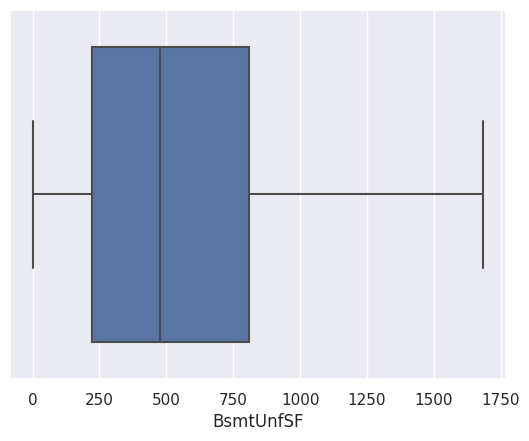

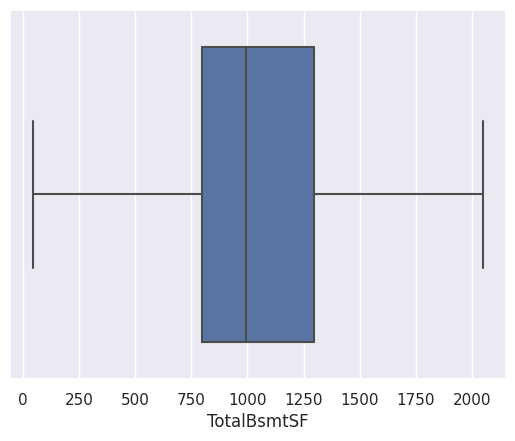

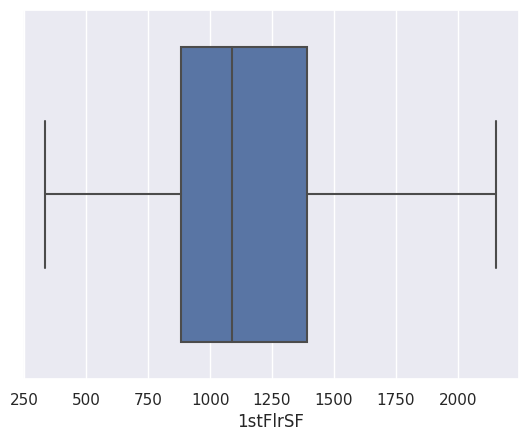

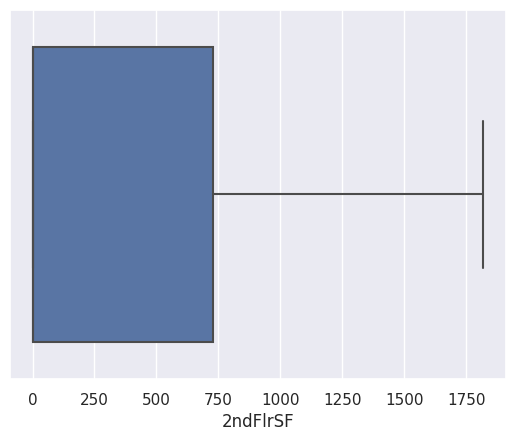

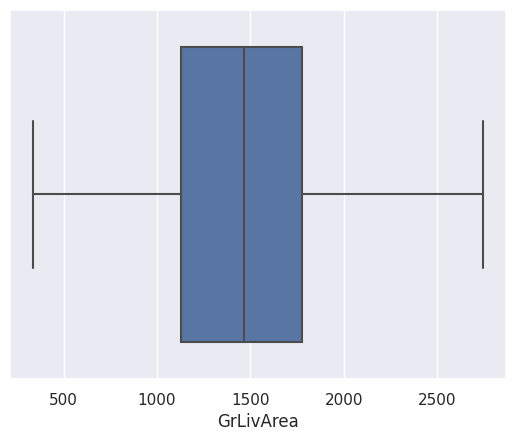

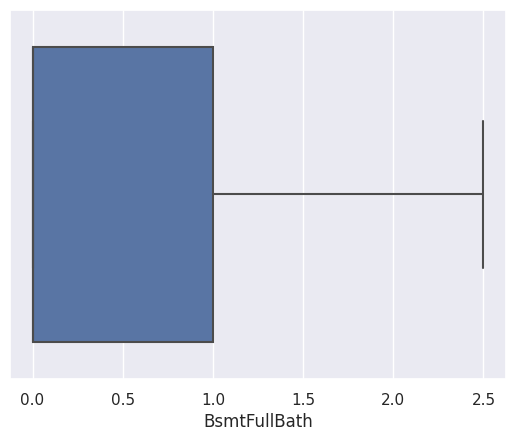

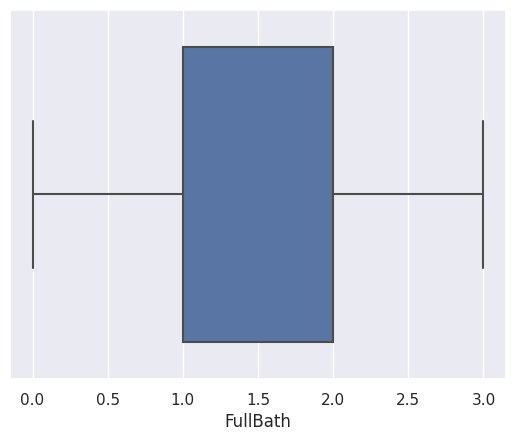

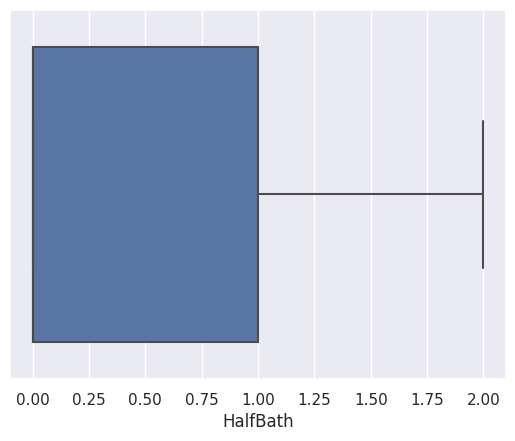

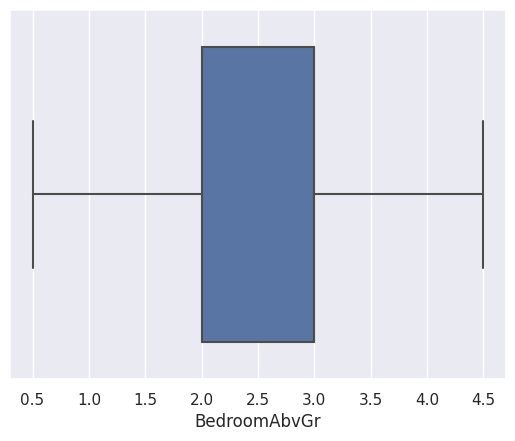

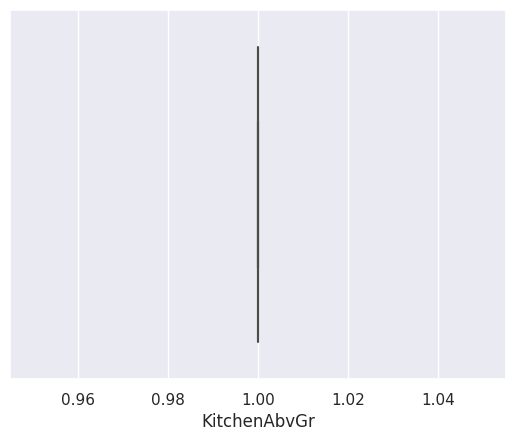

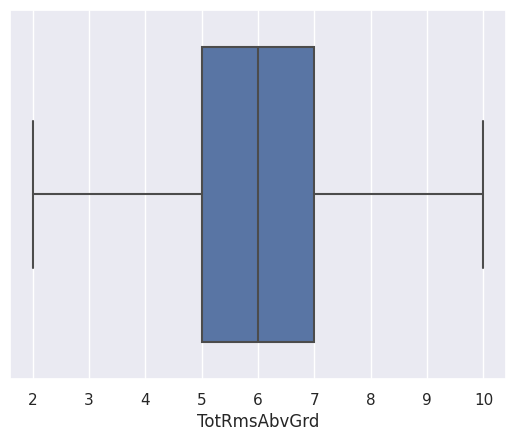

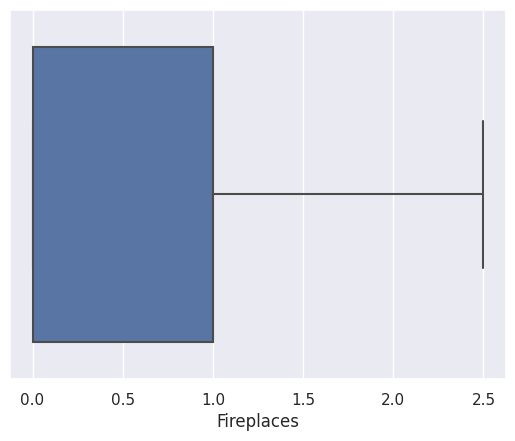

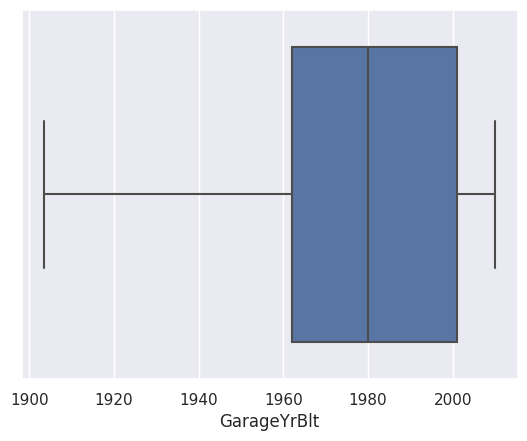

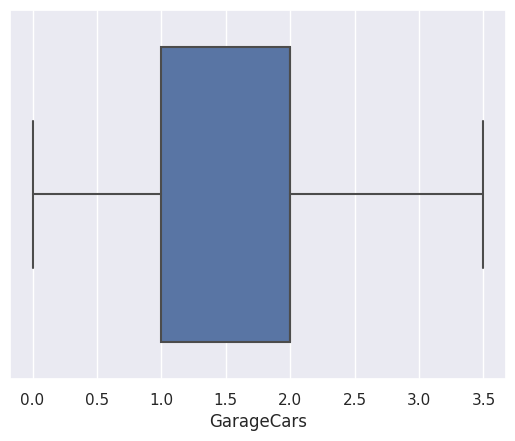

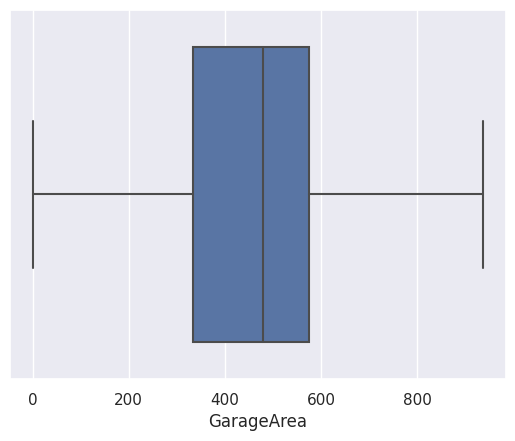

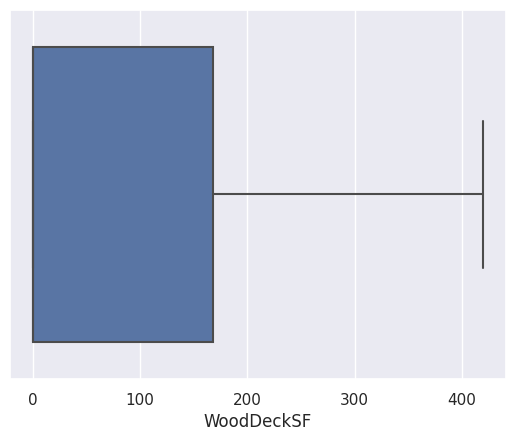

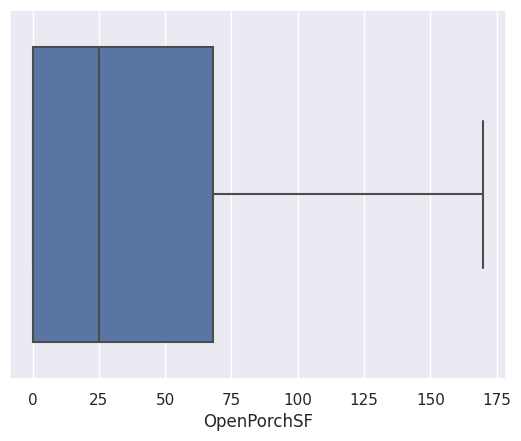

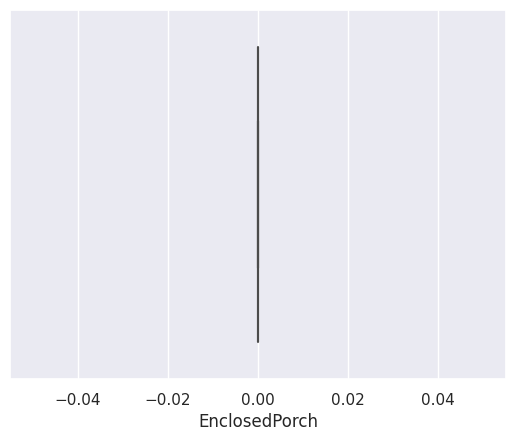

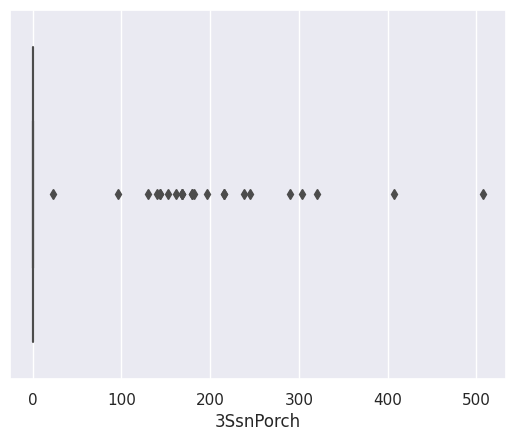

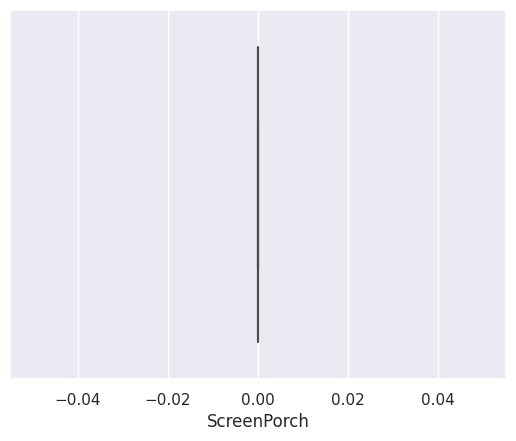

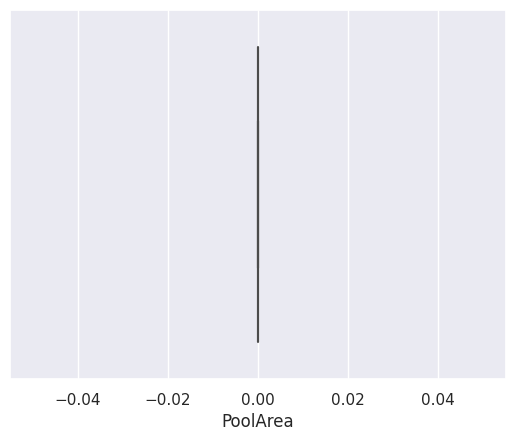

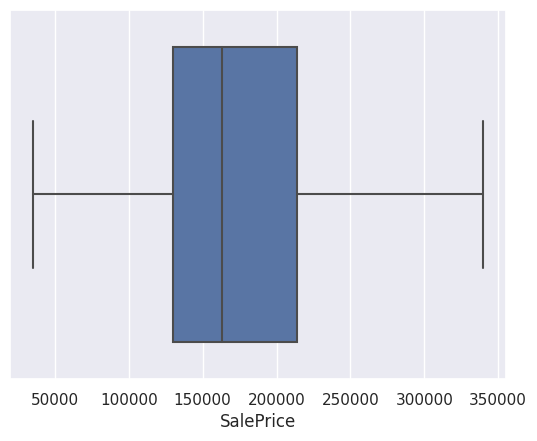

In [18]:
df1=train.select_dtypes(exclude=['object'])

for column in df1:
        sns.boxplot(data=df1, x=column)
        plt.show()


In [19]:
#Delete the columns 3SSNPorch

train.drop('3SsnPorch',axis=1,inplace=True)

In [20]:
#Encoding concept for object data:

df1=train.select_dtypes(include=['object'])
df1.head()


,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [21]:
train = pd.get_dummies(train, columns=['MSZoning'])

In [22]:
train.drop(['MSZoning_FV'],axis=1,inplace=True)

In [23]:
for col in train.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(train[col].value_counts())

----------------------------------------MSSubClass---------------------------------------- - 

MSSubClass
20.0     536
60.0     299
50.0     144
145.0    103
120.0     87
30.0      69
70.0      60
80.0      58
90.0      52
85.0      20
75.0      16
45.0      12
40.0       4
Name: count, dtype: int64

----------------------------------------LotFrontage---------------------------------------- - 

LotFrontage
69.0     270
60.0     143
70.0      70
80.0      69
107.5     58
        ... 
33.0       1
38.0       1
106.0      1
39.0       1
46.0       1
Name: count, Length: 78, dtype: int64

----------------------------------------LotArea---------------------------------------- - 

LotArea
17673.5    67
7200.0     25
9600.0     24
6000.0     17
9000.0     14
           ..
14601.0     1
6442.0      1
4058.0      1
17104.0     1
9717.0      1
Name: count, Length: 1007, dtype: int64

----------------------------------------LotShape---------------------------------------- - 

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

----------------------------------------LandContour---------------------------------------- - 

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

----------------------------------------LotConfig---------------------------------------- - 

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

----------------------------------------Neighborhood---------------------------------------- - 

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

----------------------------------------Condition1---------------------------------------- - 

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

----------------------------------------Condition2---------------------------------------- - 

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

----------------------------------------BldgType---------------------------------------- - 

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

----------------------------------------HouseStyle---------------------------------------- - 

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

----------------------------------------OverallQual---------------------------------------- - 

OverallQual
5.0     397
6.0     374
7.0     319
8.0     168
4.0     116
9.0      43
3.0      20
10.0     18
2.0       5
Name: count, dtype: int64

----------------------------------------OverallCond---------------------------------------- - 

OverallCond
5.0    821
6.0    252
7.0    205
7.5     94
4.0     57
3.5     31
Name: count, dtype: int64

----------------------------------------YearBuilt---------------------------------------- - 

YearBuilt
2006.0    67
2005.0    64
2004.0    54
2007.0    49
2003.0    45
          ..
1893.0     1
1906.0     1
1913.0     1
2010.0     1
1905.0     1
Name: count, Length: 108, dtype: int64

----------------------------------------YearRemodAdd---------------------------------------- - 

YearRemodAdd
1950.0    178
2006.0     97
2007.0     76
2005.0     73
2004.0     62
         ... 
2010.0      6
1986.0      5
1952.0      5
1983.0      5
1951.0      4
Name: count, Length: 61, dtype: int64

----------------------------------------RoofStyle---------------------------------------- - 

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

----------------------------------------RoofMatl---------------------------------------- - 

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

----------------------------------------Exterior1st---------------------------------------- - 

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

----------------------------------------Exterior2nd---------------------------------------- - 

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

----------------------------------------MasVnrType---------------------------------------- - 

MasVnrType
BrkFace    1317
Stone       128
BrkCmn       15
Name: count, dtype: int64

----------------------------------------MasVnrArea---------------------------------------- - 

MasVnrArea
0.000      869
410.625     98
108.000      8
72.000       8
180.000      8
          ... 
261.000      1
156.000      1
36.000       1
204.000      1
119.000      1
Name: count, Length: 244, dtype: int64

----------------------------------------ExterQual---------------------------------------- - 

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

----------------------------------------ExterCond---------------------------------------- - 

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

----------------------------------------Foundation---------------------------------------- - 

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

----------------------------------------BsmtQual---------------------------------------- - 

BsmtQual
TA    686
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

----------------------------------------BsmtCond---------------------------------------- - 

BsmtCond
TA    1348
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

----------------------------------------BsmtExposure---------------------------------------- - 

BsmtExposure
No    991
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

----------------------------------------BsmtFinType1---------------------------------------- - 

BsmtFinType1
Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

----------------------------------------BsmtFinSF1---------------------------------------- - 

BsmtFinSF1
0.000       467
24.000       12
16.000        9
1780.625      7
936.000       5
           ... 
1324.000      1
1460.000      1
328.000       1
379.000       1
830.000       1
Name: count, Length: 631, dtype: int64

----------------------------------------BsmtFinType2---------------------------------------- - 

BsmtFinType2
Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

----------------------------------------BsmtFinSF2---------------------------------------- - 

BsmtFinSF2
0.0    1460
Name: count, dtype: int64

----------------------------------------BsmtUnfSF---------------------------------------- - 

BsmtUnfSF
0.0       118
1685.5     29
728.0       9
384.0       8
300.0       7
         ... 
578.0       1
707.0       1
551.0       1
1257.0      1
136.0       1
Name: count, Length: 755, dtype: int64

----------------------------------------TotalBsmtSF---------------------------------------- - 

TotalBsmtSF
42.0      37
864.0     35
2052.0    24
672.0     17
912.0     15
          ..
1490.0     1
981.0      1
1766.0     1
1952.0     1
1542.0     1
Name: count, Length: 699, dtype: int64

----------------------------------------Heating---------------------------------------- - 

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

----------------------------------------HeatingQC---------------------------------------- - 

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

----------------------------------------CentralAir---------------------------------------- - 

CentralAir
Y    1365
N      95
Name: count, dtype: int64

----------------------------------------Electrical---------------------------------------- - 

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

----------------------------------------1stFlrSF---------------------------------------- - 

1stFlrSF
864.000     25
2155.125    20
1040.000    16
912.000     14
894.000     12
            ..
1838.000     1
1159.000     1
334.000      1
751.000      1
1256.000     1
Name: count, Length: 734, dtype: int64

----------------------------------------2ndFlrSF---------------------------------------- - 

2ndFlrSF
0.0       829
728.0      10
504.0       9
546.0       8
672.0       8
         ... 
914.0       1
1067.0      1
1000.0      1
687.0       1
1152.0      1
Name: count, Length: 416, dtype: int64

----------------------------------------GrLivArea---------------------------------------- - 

GrLivArea
2747.625    31
864.000     22
1040.000    14
894.000     11
1456.000    10
            ..
2296.000     1
1199.000     1
1586.000     1
1473.000     1
1256.000     1
Name: count, Length: 832, dtype: int64

----------------------------------------BsmtFullBath---------------------------------------- - 

BsmtFullBath
0.0    856
1.0    588
2.0     15
2.5      1
Name: count, dtype: int64

----------------------------------------FullBath---------------------------------------- - 

FullBath
2.0    768
1.0    650
3.0     33
0.0      9
Name: count, dtype: int64

----------------------------------------HalfBath---------------------------------------- - 

HalfBath
0.0    913
1.0    535
2.0     12
Name: count, dtype: int64

----------------------------------------BedroomAbvGr---------------------------------------- - 

BedroomAbvGr
3.0    804
2.0    358
4.0    213
1.0     50
4.5     29
0.5      6
Name: count, dtype: int64

----------------------------------------KitchenAbvGr---------------------------------------- - 

KitchenAbvGr
1.0    1460
Name: count, dtype: int64

----------------------------------------KitchenQual---------------------------------------- - 

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

----------------------------------------TotRmsAbvGrd---------------------------------------- - 

TotRmsAbvGrd
6.0     402
7.0     329
5.0     275
8.0     187
4.0      97
10.0     77
9.0      75
3.0      17
2.0       1
Name: count, dtype: int64

----------------------------------------Functional---------------------------------------- - 

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

----------------------------------------Fireplaces---------------------------------------- - 

Fireplaces
0.0    690
1.0    650
2.0    115
2.5      5
Name: count, dtype: int64

----------------------------------------GarageType---------------------------------------- - 

GarageType
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

----------------------------------------GarageYrBlt---------------------------------------- - 

GarageYrBlt
1980.0    96
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1903.5     1
1906.0     1
1908.0     1
1927.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

----------------------------------------GarageFinish---------------------------------------- - 

GarageFinish
Unf    686
RFn    422
Fin    352
Name: count, dtype: int64

----------------------------------------GarageCars---------------------------------------- - 

GarageCars
2.0    824
1.0    369
3.0    181
0.0     81
3.5      5
Name: count, dtype: int64

----------------------------------------GarageArea---------------------------------------- - 

GarageArea
0.0      81
440.0    49
576.0    47
240.0    38
484.0    34
         ..
842.0     1
816.0     1
230.0     1
261.0     1
192.0     1
Name: count, Length: 423, dtype: int64

----------------------------------------GarageQual---------------------------------------- - 

GarageQual
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

----------------------------------------GarageCond---------------------------------------- - 

GarageCond
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

----------------------------------------PavedDrive---------------------------------------- - 

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

----------------------------------------WoodDeckSF---------------------------------------- - 

WoodDeckSF
0.0      761
192.0     38
100.0     36
144.0     33
420.0     32
        ... 
126.0      1
298.0      1
260.0      1
141.0      1
366.0      1
Name: count, Length: 245, dtype: int64

----------------------------------------OpenPorchSF---------------------------------------- - 

OpenPorchSF
0.0      656
170.0     79
36.0      29
48.0      22
20.0      21
        ... 
94.0       1
11.0       1
142.0      1
119.0      1
126.0      1
Name: count, Length: 139, dtype: int64

----------------------------------------EnclosedPorch---------------------------------------- - 

EnclosedPorch
0.0    1460
Name: count, dtype: int64

----------------------------------------ScreenPorch---------------------------------------- - 

ScreenPorch
0.0    1460
Name: count, dtype: int64

----------------------------------------PoolArea---------------------------------------- - 

PoolArea
0.0    1460
Name: count, dtype: int64

----------------------------------------SaleType---------------------------------------- - 

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

----------------------------------------SaleCondition---------------------------------------- - 

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

----------------------------------------SalePrice---------------------------------------- - 

SalePrice
340037.5    61
140000.0    20
135000.0    17
145000.0    14
155000.0    14
            ..
315750.0     1
184750.0     1
106250.0     1
265000.0     1
147500.0     1
Name: count, Length: 606, dtype: int64

----------------------------------------MSZoning_C (all)---------------------------------------- - 

MSZoning_C (all)
False    1450
True       10
Name: count, dtype: int64

----------------------------------------MSZoning_RH---------------------------------------- - 

MSZoning_RH
False    1444
True       16
Name: count, dtype: int64

----------------------------------------MSZoning_RL---------------------------------------- - 

MSZoning_RL
True     1151
False     309
Name: count, dtype: int64

----------------------------------------MSZoning_RM---------------------------------------- - 

MSZoning_RM
False    1242
True      218
Name: count, dtype: int64

In [24]:
#deleting based on value counts

train.drop(['PoolArea','ScreenPorch','EnclosedPorch'],axis=1,inplace=True)

In [25]:
#train = pd.get_dummies(train, columns=['Neighborhood'])
#train = pd.get_dummies(train, columns=['KitchenQual'])
train = pd.get_dummies(train, columns=['BsmtFinType2'])


In [26]:
train['CentralAir']=train['CentralAir'].astype('category')
train['CentralAir']=train['CentralAir'].cat.codes

In [27]:
train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,MSZoning_C (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf
0,60.0,65.0,8450.0,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,0.0,150.0,856.0,GasA,Ex,1,SBrkr,856.0,854.0,1710.0,1.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,WD,Normal,208500.0,False,False,True,False,False,False,False,False,False,True
1,20.0,80.0,9600.0,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6.0,7.5,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,0.0,284.0,1262.0,GasA,Ex,1,SBrkr,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,WD,Normal,181500.0,False,False,True,False,False,False,False,False,False,True
2,60.0,68.0,11250.0,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,0.0,434.0,920.0,GasA,Ex,1,SBrkr,920.0,866.0,1786.0,1.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,WD,Normal,223500.0,False,False,True,False,False,False,False,False,False,True
3,70.0,60.0,9550.0,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,0.0,540.0,756.0,GasA,Gd,1,SBrkr,961.0,756.0,1717.0,1.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,WD,Abnorml,140000.0,False,False,True,False,False,False,False,False,False,True
4,60.0,84.0,14260.0,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,0.0,490.0,1145.0,GasA,Ex,1,SBrkr,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,WD,Normal,250000.0,False,False,True,False,False,False,False,False,False,True


In [28]:
#train = pd.get_dummies(train, columns=['Street'])
train = pd.get_dummies(train, columns=['LotShape'])
train = pd.get_dummies(train, columns=['LotConfig'])
train = pd.get_dummies(train, columns=['LandContour'])
#train = pd.get_dummies(train, columns=['LandSlope'])
train = pd.get_dummies(train, columns=['Neighborhood'])
train = pd.get_dummies(train, columns=['Condition1'])
train = pd.get_dummies(train, columns=['Condition2'])
train = pd.get_dummies(train, columns=['BldgType'])
train = pd.get_dummies(train, columns=['HouseStyle'])
train = pd.get_dummies(train, columns=['RoofStyle'])
train = pd.get_dummies(train, columns=['RoofMatl'])
train = pd.get_dummies(train, columns=['Exterior1st'])
#all_data = pd.get_dummies(all_data, columns=['Exterior2nd'])
train = pd.get_dummies(train, columns=['MasVnrType'])
train = pd.get_dummies(train, columns=['ExterQual'])
train = pd.get_dummies(train, columns=['ExterCond'])
train = pd.get_dummies(train, columns=['Foundation'])
train = pd.get_dummies(train, columns=['BsmtQual'])
train = pd.get_dummies(train, columns=['BsmtCond'])
train = pd.get_dummies(train, columns=['BsmtExposure'])
train = pd.get_dummies(train, columns=['BsmtFinType1'])
train = pd.get_dummies(train, columns=['Exterior2nd'])
train = pd.get_dummies(train, columns=['Heating'])
train = pd.get_dummies(train, columns=['HeatingQC'])
train = pd.get_dummies(train, columns=['CentralAir'])
train = pd.get_dummies(train, columns=['Electrical'])
train = pd.get_dummies(train, columns=['KitchenQual'])
train = pd.get_dummies(train, columns=['Functional'])
train = pd.get_dummies(train, columns=['GarageType'])
train = pd.get_dummies(train, columns=['GarageFinish'])
train = pd.get_dummies(train, columns=['GarageQual'])
train = pd.get_dummies(train, columns=['GarageCond'])
train = pd.get_dummies(train, columns=['PavedDrive'])
train = pd.get_dummies(train, columns=['SaleType'])
train = pd.get_dummies(train, columns=['SaleCondition'])

In [29]:
#Splitting the data into dependant and independant variables
x=train.loc[:, train.columns != 'SalePrice']
y=train['SalePrice']

In [30]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [31]:
x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MSZoning_C (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_0,CentralAir_1,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_

In [32]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251
0,0.131067,-0.237456,-0.333244,0.652644,-0.564161,1.053246,0.878668,0.795643,0.614224,0.0,-0.958790,-0.488321,-0.830489,1.164283,0.428636,1.111765,0.789741,1.227585,0.195307,0.0,0.981148,-0.957043,1.017824,0.315946,0.373509,-0.787243,0.350520,-0.083045,-0.105263,0.518133,-0.418955,-0.114827,-0.152071,-0.098397,-0.180366,-0.195977,0.358168,-0.704203,-0.169981,-0.083045,0.760512,-0.468739,-0.262324,-0.182380,-0.052414,0.622762,-0.21236,-0.188311,-0.159,0.337126,-0.10854,-0.037037,-0.105263,-0.203395,-0.139832,2.955221,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.184376,-0.242360,0.39841,-0.074227,-0.114827,-0.087129,-0.134652,-0.037037,-0.058621,-0.037037,-0.064238,0.101885,-0.02618,-0.037037,-0.02618,-0.02618,-0.037037,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.343391,-0.098397,-0.994535,-0.074227,-0.087129,1.510265,-0.16125,-0.215859,-0.094785,0.528753,-0.087129,-0.493570,-0.069409,-0.037037,-0.02618,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.117851,-0.02618,-0.037037,-0.188311,-0.02618,-0.208812,-0.423464,-0.02618,-0.421212,-0.282633,-0.037037,-0.131991,1.354604,-0.405308,-0.134652,-0.101885,0.329515,-0.309994,-0.192177,-0.098397,1.411313,-1.278819,-0.045376,-0.139832,-0.333333,-0.02618,0.37262,-0.333333,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,-0.300609,-0.156721,1.167244,-0.941438,-0.178331,-0.215859,-0.037037,0.288247,-0.422338,-0.317893,-0.291025,0.687938,-0.421212,-0.335864,1.578868,-0.231065,-0.316585,-0.685778,-0.117851,-0.045376,-0.069409,-0.131991,-0.02618,-0.207020,-0.406452,-0.083045,-0.414427,-0.02618,-0.328236,-0.058621,-0.134652,1.377253,-0.39494,-0.163471,-0.02618,0.149696,-0.111726,-0.069409,-0.037037,-0.052414,0.985043,-0.186352,-0.444638,-0.02618,-0.643994,-0.263813,0.263813,-0.262324,-0.137265,-0.045376,-0.02618,0.305995,-0.271163,-0.165667,1.221257,-1.006873,-0.098397,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,-0.064238,0.731591,-0.114827,-0.253259,-0.078757,-0.600559,-0.563640,1.568348,-0.941438,-0.045376,-0.184376,-0.098397,-0.045376,0.221022,-0.037037,-0.156721,-0.078757,-0.069409,0.194085,-0.256307,-0.144841,0.299253,-0.1742,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.935733,0.633321,-0.013189,-0.073068,2.030907,0.156179,-0.429577,-0.667353,1.242296,0.0,-0.648290,0.532289,0.289638,-0.796041,-0.502349,-0.821739,0.789741,-0.761621,0.195307,0.0,-0.316385,0.608540,-0.108062,0.315946,-0.051541,1.768105,-0.811747,-0.083045,-0.105263,0.518133,-0.418955,-0.114827,-0.152071,-0.098397,-0.180366,-0.195977,0.358168,-0.704203,-0.169981,-0.083045,0.760512,-0.468739,-0.262324,5.483049,-0.052414,-1.605749,-0.21236,-0.188311,-0.159,0.337126,-0.10854,-0.037037,-0.105263,-0.203395,-0.139832,-0.338384,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.20521

In [33]:
x.drop(['BsmtFinSF2','MSSubClass','RoofMatl_ClyTile','Exterior1st_AsbShng','Exterior2nd_BrkFace','MasVnrType_BrkCmn',
       'ExterQual_Ex','ExterCond_Po','Foundation_CBlock','BsmtCond_Fa','BsmtCond_Fa','BsmtExposure_Mn','BsmtFinType1_BLQ'
       ,'Heating_GasA','HeatingQC_Fa','Electrical_FuseF','Functional_Maj1','GarageType_Attchd','GarageFinish_RFn',
       'GarageQual_Po','GarageCond_TA','PavedDrive_P','SaleType_Con','SaleCondition_Abnorml','LotShape_IR2','LandContour_Bnk',
       'LotConfig_CulDSac','RoofStyle_Gambrel','Neighborhood_Blmngtn','Condition1_PosA','Condition2_PosA','BldgType_2fmCon'
       ,'HouseStyle_1Story','KitchenQual_Gd','BsmtFinType2_LwQ'],axis=1,inplace=True)

In [34]:
#Split the data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=101)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(803, 218) (657, 218) (803,) (657,)


In [35]:
#Normal Linear Regression

from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

# Predict price by using lm model with test dataset

y_pred_price = lm.predict(x_test)
y_pred_price_train = lm.predict(x_train)

# Validate the actual price of the test data and predicted price

from sklearn.metrics import r2_score
print("Training:",r2_score(y_train, y_pred_price_train))
print("Test:",r2_score(y_test, y_pred_price))


Training: 0.9470962408280812
Test: 0.8687979389825156


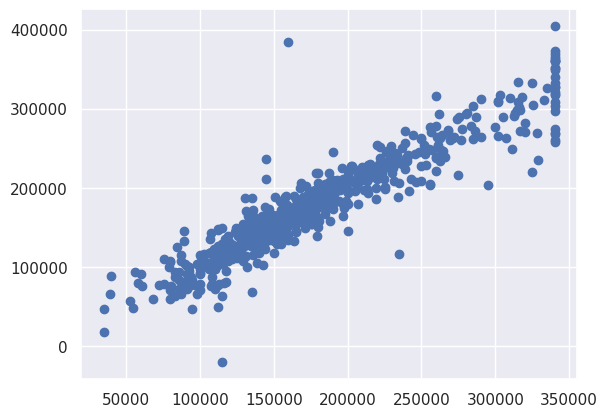

In [36]:
#Check linearity

plt.scatter(y_test, y_pred_price)

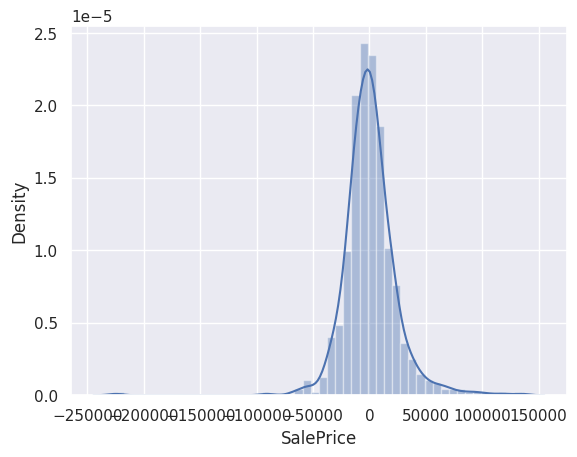

In [37]:
# Normality of Residual

sns.distplot((y_test - y_pred_price), bins=50)
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))
print()
print(r2_score(y_test, y_pred_test))

0.9831849079438287

0.8801863158605512


In [40]:
from sklearn.model_selection import cross_val_score
training_accuracy=cross_val_score(rf, x_train,y_train,cv=10)
print(training_accuracy.mean())

0.8793296366765931


In [41]:
from sklearn.model_selection import cross_val_score
test_accuracy=cross_val_score(rf, x_test,y_test,cv=10)
print(test_accuracy.mean())

0.868120841929709


In [42]:
#Boosting techniques
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
gdb = GradientBoostingRegressor()
gd = gdb.fit(x_train, y_train)
y_pred_train = gd.predict(x_train)
y_pred_test = gd.predict(x_test)


# Evaluate the model
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))
print()
print(r2_score(y_test, y_pred_test))

0.9710988606761147

0.9067691151180485
